In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import datetime as dt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import numpy as np
import datetime


In [2]:
covid_cases_df = pd.read_csv ('cases_daily_state.csv')
#convert Date to datetime format
covid_cases_df["Date"] = pd.to_datetime(covid_cases_df["Date"])
covid_cases_df.head()


,Date,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,2020-01-25,3,1,0.0,0.0,0.0,0,0.0,0.0
1,2020-01-26,0,0,0.0,0.0,0.0,0,0.0,0.0
2,2020-01-27,1,0,0.0,0.0,0.0,0,0.0,0.0
3,2020-01-28,0,0,0.0,0.0,0.0,0,0.0,0.0
4,2020-01-29,0,2,2.0,0.0,0.0,0,0.0,0.0


In [3]:
covid_cases_df.set_index('Date', inplace=True)
covid_cases_df.index = pd.to_datetime(covid_cases_df.index)
monthly_cases_df = covid_cases_df.resample('M').sum()
monthly_cases_df.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
Date,,,,,,,,
2020-01-31,4,3,2.0,0.0,0.0,0,0.0,0.0
2020-02-29,0,4,7.0,3.0,2.0,0,0.0,0.0
2020-03-31,2028,912,735.0,334.0,362.0,70,19.0,80.0
2020-04-30,1013,447,319.0,101.0,187.0,152,9.0,29.0
2020-05-31,97,307,23.0,2.0,33.0,5,2.0,1.0


In [4]:
monthly_cases_df
monthly_cases_df.reset_index()

,Date,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,2020-01-31,4,3,2.0,0.0,0.0,0,0.0,0.0
1,2020-02-29,0,4,7.0,3.0,2.0,0,0.0,0.0
2,2020-03-31,2028,912,735.0,334.0,362.0,70,19.0,80.0
3,2020-04-30,1013,447,319.0,101.0,187.0,152,9.0,29.0
4,2020-05-31,97,307,23.0,2.0,33.0,5,2.0,1.0
5,2020-06-30,105,533,7.0,3.0,15.0,0,0.0,1.0
6,2020-07-31,390,9015,15.0,7.0,41.0,1,3.0,5.0
7,2020-08-31,298,9186,36.0,14.0,15.0,1,1.0,0.0
8,2020-09-30,180,1200,34.0,3.0,29.0,0,0.0,0.0
9,2020-10-31,198,202,12.0,34.0,84.0,0,5.0,1.0


In [5]:
monthly_cases_df['Total'] = monthly_cases_df.sum(axis=1)
monthly_cases_df.reset_index()

,Date,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,Total
0,2020-01-31,4,3,2.0,0.0,0.0,0,0.0,0.0,9.0
1,2020-02-29,0,4,7.0,3.0,2.0,0,0.0,0.0,16.0
2,2020-03-31,2028,912,735.0,334.0,362.0,70,19.0,80.0,4540.0
3,2020-04-30,1013,447,319.0,101.0,187.0,152,9.0,29.0,2257.0
4,2020-05-31,97,307,23.0,2.0,33.0,5,2.0,1.0,470.0
5,2020-06-30,105,533,7.0,3.0,15.0,0,0.0,1.0,664.0
6,2020-07-31,390,9015,15.0,7.0,41.0,1,3.0,5.0,9477.0
7,2020-08-31,298,9186,36.0,14.0,15.0,1,1.0,0.0,9551.0
8,2020-09-30,180,1200,34.0,3.0,29.0,0,0.0,0.0,1446.0
9,2020-10-31,198,202,12.0,34.0,84.0,0,5.0,1.0,536.0


In [6]:
monthly_cases_df['NSW %'] = (monthly_cases_df['NSW']/monthly_cases_df['Total'])*100
monthly_cases_df['VIC %'] = (monthly_cases_df['VIC']/monthly_cases_df['Total'])*100
monthly_cases_df['QLD %'] = (monthly_cases_df['QLD']/monthly_cases_df['Total'])*100
monthly_cases_df['SA %'] = (monthly_cases_df['SA']/monthly_cases_df['Total'])*100
monthly_cases_df['WA %'] = (monthly_cases_df['WA']/monthly_cases_df['Total'])*100
monthly_cases_df['TAS %'] = (monthly_cases_df['TAS']/monthly_cases_df['Total'])*100
monthly_cases_df['NT %'] = (monthly_cases_df['NT']/monthly_cases_df['Total'])*100
monthly_cases_df['ACT %'] = (monthly_cases_df['ACT']/monthly_cases_df['Total'])*100

monthly_cases_df.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,Total,NSW %,VIC %,QLD %,SA %,WA %,TAS %,NT %,ACT %
Date,,,,,,,,,,,,,,,,,
2020-01-31,4,3,2.0,0.0,0.0,0,0.0,0.0,9.0,44.444444,33.333333,22.222222,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-29,0,4,7.0,3.0,2.0,0,0.0,0.0,16.0,0.000000,25.000000,43.750000,18.750000,12.500000,0.000000,0.000000,0.000000
2020-03-31,2028,912,735.0,334.0,362.0,70,19.0,80.0,4540.0,44.669604,20.088106,16.189427,7.356828,7.973568,1.541850,0.418502,1.762115
2020-04-30,1013,447,319.0,101.0,187.0,152,9.0,29.0,2257.0,44.882588,19.805051,14.133806,4.474967,8.285335,6.734603,0.398759,1.284891
2020-05-31,97,307,23.0,2.0,33.0,5,2.0,1.0,470.0,20.638298,65.319149,4.893617,0.425532,7.021277,1.063830,0.425532,0.212766


In [7]:
percent_change_df = monthly_cases_df.diff()

percent_change_df['NSW % variance'] = (percent_change_df['NSW']/percent_change_df['Total'])*100
percent_change_df['VIC % variance'] = (percent_change_df['VIC']/percent_change_df['Total'])*100
percent_change_df['QLD % variance'] = (percent_change_df['QLD']/percent_change_df['Total'])*100
percent_change_df['SA % variance'] = (percent_change_df['SA']/percent_change_df['Total'])*100
percent_change_df['WA % variance'] = (percent_change_df['WA']/percent_change_df['Total'])*100
percent_change_df['TAS % variance'] = (percent_change_df['TAS']/percent_change_df['Total'])*100
percent_change_df['NT % variance'] = (percent_change_df['NT']/percent_change_df['Total'])*100
percent_change_df['ACT % variance'] = (percent_change_df['ACT']/percent_change_df['Total'])*100
percent_change_df['Total Cases']= monthly_cases_df['Total']
percent_change_df['Total % variance']= (percent_change_df.pct_change(fill_method='ffill')['Total Cases'])*100
percent_change_df.rename(columns = {'Total':'Difference in total',
                                   'NSW':'Difference NSW',
                                   'VIC':'Difference VIC',
                                   'QLD':'Difference QLD',
                                   'SA':'Difference SA',
                                   'WA':'Difference WA',
                                   'TAS':'Difference TAS',
                                   'NT':'Difference NT',
                                   'ACT': 'Difference ACT'
                                   }, inplace = True)
percent_change_df.reset_index()

del percent_change_df["NSW %"]
del percent_change_df["VIC %"]
del percent_change_df["QLD %"]
del percent_change_df["SA %"]
del percent_change_df["WA %"]
del percent_change_df["TAS %"]
del percent_change_df["NT %"]
del percent_change_df["ACT %"]

percent_change_df



,Difference NSW,Difference VIC,Difference QLD,Difference SA,Difference WA,Difference TAS,Difference NT,Difference ACT,Difference in total,NSW % variance,VIC % variance,QLD % variance,SA % variance,WA % variance,TAS % variance,NT % variance,ACT % variance,Total Cases,Total % variance
Date,,,,,,,,,,,,,,,,,,,
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
2020-02-29,-4.0,1.0,5.0,3.0,2.0,0.0,0.0,0.0,7.0,-57.142857,14.285714,71.428571,42.857143,28.571429,0.000000,0.000000,0.000000,16.0,77.777778
2020-03-31,2028.0,908.0,728.0,331.0,360.0,70.0,19.0,80.0,4524.0,44.827586,20.070734,16.091954,7.316534,7.957560,1.547303,0.419982,1.768347,4540.0,28275.000000
2020-04-30,-1015.0,-465.0,-416.0,-233.0,-175.0,82.0,-10.0,-51.0,-2283.0,44.459045,20.367937,18.221638,10.205869,7.665353,-3.591765,0.438020,2.233903,2257.0,-50.286344
2020-05-31,-916.0,-140.0,-296.0,-99.0,-154.0,-147.0,-7.0,-28.0,-1787.0,51.259093,7.834359,16.564074,5.540011,8.617795,8.226077,0.391718,1.566872,470.0,-79.175897
2020-06-30,8.0,226.0,-16.0,1.0,-18.0,-5.0,-2.0,0.0,194.0,4.123711,116.494845,-8.247423,0.515464,-9.278351,-2.577320,-1.030928,0.000000,664.0,41.276596
2020-07-31,285.0,8482.0,8.0,4.0,26.0,1.0,3.0,4.0,8813.0,3.233859,96.244185,0.090775,0.045387,0.295019,0.011347,0.034041,0.045387,9477.0,1327.259036
2020-08-31,-92.0,171.0,21.0,7.0,-26.0,0.0,-2.0,-5.0,74.0,-124.324324,231.081081,28.378378,9.459459,-35.135135,0.000000,-2.702703,-6.756757,9551.0,0.780838
2020-09-30,-118.0,-7986.0,-2.0,-11.0,14.0,-1.0,-1.0,0.0,-8105.0,1.455891,98.531771,0.024676,0.135719,-0.172733,0.012338,0.012338,-0.000000,1446.0,-84.860224


In [8]:
percent_change_df=percent_change_df.reset_index()
percent_change_df.head()

,Date,Difference NSW,Difference VIC,Difference QLD,Difference SA,Difference WA,Difference TAS,Difference NT,Difference ACT,Difference in total,NSW % variance,VIC % variance,QLD % variance,SA % variance,WA % variance,TAS % variance,NT % variance,ACT % variance,Total Cases,Total % variance
0,2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
1,2020-02-29,-4.0,1.0,5.0,3.0,2.0,0.0,0.0,0.0,7.0,-57.142857,14.285714,71.428571,42.857143,28.571429,0.000000,0.000000,0.000000,16.0,77.777778
2,2020-03-31,2028.0,908.0,728.0,331.0,360.0,70.0,19.0,80.0,4524.0,44.827586,20.070734,16.091954,7.316534,7.957560,1.547303,0.419982,1.768347,4540.0,28275.000000
3,2020-04-30,-1015.0,-465.0,-416.0,-233.0,-175.0,82.0,-10.0,-51.0,-2283.0,44.459045,20.367937,18.221638,10.205869,7.665353,-3.591765,0.438020,2.233903,2257.0,-50.286344
4,2020-05-31,-916.0,-140.0,-296.0,-99.0,-154.0,-147.0,-7.0,-28.0,-1787.0,51.259093,7.834359,16.564074,5.540011,8.617795,8.226077,0.391718,1.566872,470.0,-79.175897


In [9]:
percent_change_df = percent_change_df.drop(percent_change_df.index [ [ 0 ] ])
percent_change_df= percent_change_df.iloc[: -2, :]
percent_change_df.head()

,Date,Difference NSW,Difference VIC,Difference QLD,Difference SA,Difference WA,Difference TAS,Difference NT,Difference ACT,Difference in total,NSW % variance,VIC % variance,QLD % variance,SA % variance,WA % variance,TAS % variance,NT % variance,ACT % variance,Total Cases,Total % variance
1,2020-02-29,-4.0,1.0,5.0,3.0,2.0,0.0,0.0,0.0,7.0,-57.142857,14.285714,71.428571,42.857143,28.571429,0.000000,0.000000,0.000000,16.0,77.777778
2,2020-03-31,2028.0,908.0,728.0,331.0,360.0,70.0,19.0,80.0,4524.0,44.827586,20.070734,16.091954,7.316534,7.957560,1.547303,0.419982,1.768347,4540.0,28275.000000
3,2020-04-30,-1015.0,-465.0,-416.0,-233.0,-175.0,82.0,-10.0,-51.0,-2283.0,44.459045,20.367937,18.221638,10.205869,7.665353,-3.591765,0.438020,2.233903,2257.0,-50.286344
4,2020-05-31,-916.0,-140.0,-296.0,-99.0,-154.0,-147.0,-7.0,-28.0,-1787.0,51.259093,7.834359,16.564074,5.540011,8.617795,8.226077,0.391718,1.566872,470.0,-79.175897
5,2020-06-30,8.0,226.0,-16.0,1.0,-18.0,-5.0,-2.0,0.0,194.0,4.123711,116.494845,-8.247423,0.515464,-9.278351,-2.577320,-1.030928,0.000000,664.0,41.276596


In [10]:
percent_change_df.describe()

,Difference NSW,Difference VIC,Difference QLD,Difference SA,Difference WA,Difference TAS,Difference NT,Difference ACT,Difference in total,NSW % variance,VIC % variance,QLD % variance,SA % variance,WA % variance,TAS % variance,NT % variance,ACT % variance,Total Cases,Total % variance
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,4622.391304,2416.695652,511.434783,442.695652,1.434783,23.913043,12.521739,83.913043,8115.000000,28.680670,50.385178,9.738998,4.457540,3.255742,0.457638,2.786107,0.238128,17464.826087,1354.245270
std,21929.075300,10574.934874,2452.028396,2122.008535,94.183489,120.689275,50.605308,354.158916,31802.401003,70.300780,76.051109,22.544006,12.856463,12.489207,2.225210,9.758037,1.956073,41165.245016,5876.929490
min,-22674.000000,-19303.000000,-416.000000,-233.000000,-175.000000,-147.000000,-51.000000,-460.000000,-26430.000000,-152.964987,-72.222222,-38.888889,-23.195876,-35.135135,-3.591765,-4.444444,-6.756757,16.000000,-84.860224
25%,-114.500000,-97.500000,-29.000000,-12.000000,-23.500000,0.000000,-3.000000,-1.500000,-241.000000,3.678785,10.102747,0.002219,-0.162392,-0.119061,0.000000,-0.367423,0.000000,445.000000,-40.481236
50%,8.000000,38.000000,3.000000,3.000000,-1.000000,0.000000,4.000000,0.000000,144.000000,42.366412,20.367937,2.417582,0.515464,0.295019,0.000000,0.033731,0.045387,664.000000,41.276596
75%,237.500000,567.000000,24.000000,26.500000,19.000000,1.000000,6.500000,4.500000,3775.500000,57.169775,94.031183,16.328014,9.832664,9.743680,0.012915,0.429001,1.622342,9514.000000,138.567569
max,99784.000000,37245.000000,11724.000000,10168.000000,360.000000,548.000000,225.000000,1574.000000,146159.000000,183.333333,251.264926,71.428571,42.857143,28.571429,8.226077,38.194444,2.717391,186654.000000,28275.000000


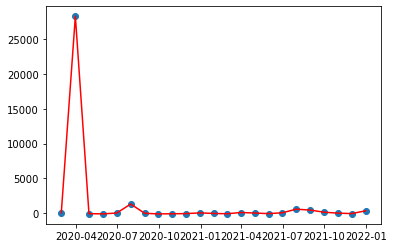

In [11]:
dates =percent_change_df[["Date"]]
Total_COVID_variance_percentage = percent_change_df["Total % variance"]
#Total_Industry_variance_percentage=cut_df["% change from preceding month ; Total (State) ; Food retailing ;"]

rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
#ax.xaxis.set_major_locator(loc)
#ax.xaxis.set_major_formatter(formatter)
#ax.xaxis.set_tick_params(rotation=90, labelsize=10)

plt.plot_date(dates ,Total_COVID_variance_percentage, fmt='o', tz=None, xdate=True, ydate=False, data=None)
plt.plot_date(dates ,Total_COVID_variance_percentage, 'r')
#plt.plot_date(dates ,Total_Industry_variance_percentage, 'b')

#fig.autofmt_xdate()
plt.show()

In [12]:
Cleaned_state_turnover_perc_change = pd.read_csv("output_data/renamed_state.csv")
Cleaned_industry_turnover_perc_change = pd.read_csv("output_data/renamed_industry.csv")

In [13]:
Cleaned_state_turnover_perc_change = Cleaned_state_turnover_perc_change.iloc[3: , :]
Cleaned_state_turnover_perc_change.head()

,Date,% Change NSW,% Change VIC,% Change QLD,% Change SA,% Change WA,% Change TAS,% Change NT,% Change ACT,% Change Total,% Change NSW Seasonal,% Change VIC Seasonal,% Change QLD Seasonal,% Change SA Seasonal,% Change WA Seasonal,% Change TAS Seasonal,% Change NT Seasonal,% Change ACT Seasonal,% Change Total Seasonal
3,2020-02-01 00:00:00,-7.9,-6.0,-8.1,-6.9,-5.4,-6.9,-1.8,-1.3,-6.9,-0.1,0.8,1.1,0.5,1.4,-0.1,-0.4,1.5,0.6
4,2020-03-01 00:00:00,14.0,14.3,14.9,17.0,15.6,13.8,18.8,15.0,14.7,7.7,7.1,8.6,9.1,9.8,8.8,11.2,9.0,8.1
5,2020-04-01 00:00:00,-18.9,-22.3,-16.9,-16.5,-17.9,-20.2,-6.8,-17.3,-19.0,-17.4,-20.7,-15.4,-14.4,-16.4,-17.3,-7.3,-14.7,-17.4
6,2020-05-01 00:00:00,19.6,18.6,19.1,19.1,21.9,18.5,14.7,16.1,19.3,16.4,16.8,16.4,16.1,19.2,17.3,7.6,12.3,16.6
7,2020-06-01 00:00:00,2.1,2.6,0.5,-1.4,0.4,1.4,-1.3,1.0,1.4,3.4,4.2,0.7,1.0,2.7,3.5,-4.2,3.7,2.7


In [14]:
Cleaned_industry_turnover_perc_change
Cleaned_industry_turnover_perc_change = Cleaned_industry_turnover_perc_change.iloc[3: , :]
Cleaned_industry_turnover_perc_change.head()

,Date,% change Food Retailing,% change Household Good Retailing,"% change Clothing, Footwear and Personal Accessory Retailing",% change Department Stores,% change Other Retailing,"% change Cafes, Restaurants and Takeaway",% change Total Industry,% change Food Retailing Seasonal,% change Household Goods Retailing Seasonal,"% change Clothing, Footwear and Personal Accessory Retailing Seasonal",% change Department Stores Seasonal,% change Other Retailing Seasonal,"% change Cafes, Restaurants and Takeaway Seasonal",% change Total Industry Seasonal
3,2020-02-01 00:00:00,-4.4,-7.6,-17.7,-16.7,-4.2,-6.9,-6.9,0.7,0.8,-2.8,4.3,0.6,0.7,0.6
4,2020-03-01 00:00:00,29.3,12.8,-15.5,5.2,21.1,-17.0,14.7,23.7,8.2,-22.3,-8.7,16.3,-22.9,8.1
5,2020-04-01 00:00:00,-18.6,-4.6,-51.5,-5.2,-17.1,-36.6,-19.0,-17.1,0.8,-54.0,-15.2,-13.8,-35.4,-17.4
6,2020-05-01 00:00:00,7.3,23.7,147.3,44.2,13.3,31.0,19.3,7.0,16.3,131.4,43.8,8.6,30.5,16.6
7,2020-06-01 00:00:00,-4.5,2.7,18.1,-8.2,0.3,24.5,1.4,0.9,-3.7,20.8,-10.7,0.1,28.0,2.7


In [15]:
Cleaned_state_turnover_perc_change.describe()

,% Change NSW,% Change VIC,% Change QLD,% Change SA,% Change WA,% Change TAS,% Change NT,% Change ACT,% Change Total,% Change NSW Seasonal,% Change VIC Seasonal,% Change QLD Seasonal,% Change SA Seasonal,% Change WA Seasonal,% Change TAS Seasonal,% Change NT Seasonal,% Change ACT Seasonal,% Change Total Seasonal
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2.347826,2.673913,2.286957,2.104348,2.621739,2.069565,2.034783,2.695652,2.360870,0.800000,0.991304,0.873913,0.586957,1.060870,0.686957,0.773913,1.108696,0.813043
std,11.301644,13.487544,10.738516,10.692754,11.318808,10.565486,8.772043,13.257330,11.019971,6.805279,9.570025,5.422698,5.403307,6.141938,5.910876,3.768918,9.100495,6.182476
min,-22.700000,-23.700000,-21.700000,-22.000000,-20.900000,-20.200000,-18.700000,-21.900000,-22.400000,-17.400000,-20.700000,-15.400000,-14.400000,-16.400000,-17.300000,-7.300000,-19.900000,-17.400000
25%,-3.400000,-4.250000,-2.600000,-2.400000,-1.750000,-3.050000,-3.050000,-2.200000,-3.100000,-2.100000,-3.000000,-0.900000,-1.150000,-0.800000,-1.550000,-1.150000,-1.000000,-1.750000
50%,3.800000,1.300000,3.600000,1.200000,2.000000,2.600000,-0.300000,2.700000,1.900000,0.500000,0.800000,0.300000,0.200000,1.200000,0.600000,0.800000,0.900000,0.600000
75%,10.600000,13.800000,7.100000,6.000000,7.100000,7.000000,9.500000,11.050000,10.350000,2.850000,3.850000,1.350000,0.950000,2.250000,2.600000,2.250000,2.900000,3.050000
max,19.600000,26.000000,19.600000,21.400000,21.900000,18.600000,18.800000,29.300000,19.300000,16.400000,22.000000,16.400000,16.100000,19.200000,17.300000,11.200000,20.200000,16.600000


In [16]:
Cleaned_industry_turnover_perc_change

,Date,% change Food Retailing,% change Household Good Retailing,"% change Clothing, Footwear and Personal Accessory Retailing",% change Department Stores,% change Other Retailing,"% change Cafes, Restaurants and Takeaway",% change Total Industry,% change Food Retailing Seasonal,% change Household Goods Retailing Seasonal,"% change Clothing, Footwear and Personal Accessory Retailing Seasonal",% change Department Stores Seasonal,% change Other Retailing Seasonal,"% change Cafes, Restaurants and Takeaway Seasonal",% change Total Industry Seasonal
3,2020-02-01 00:00:00,-4.4,-7.6,-17.7,-16.7,-4.2,-6.9,-6.9,0.7,0.8,-2.8,4.3,0.6,0.7,0.6
4,2020-03-01 00:00:00,29.3,12.8,-15.5,5.2,21.1,-17.0,14.7,23.7,8.2,-22.3,-8.7,16.3,-22.9,8.1
5,2020-04-01 00:00:00,-18.6,-4.6,-51.5,-5.2,-17.1,-36.6,-19.0,-17.1,0.8,-54.0,-15.2,-13.8,-35.4,-17.4
6,2020-05-01 00:00:00,7.3,23.7,147.3,44.2,13.3,31.0,19.3,7.0,16.3,131.4,43.8,8.6,30.5,16.6
7,2020-06-01 00:00:00,-4.5,2.7,18.1,-8.2,0.3,24.5,1.4,0.9,-3.7,20.8,-10.7,0.1,28.0,2.7
8,2020-07-01 00:00:00,6.2,0.1,2.4,-1.9,7.9,11.1,5.0,1.5,5.0,5.9,2.7,4.9,4.8,3.4
9,2020-08-01 00:00:00,0.6,-7.4,-14.5,-19.1,-5.9,-6.6,-4.8,-0.3,-6.6,-10.6,-8.5,-5.1,-6.3,-4.1
10,2020-09-01 00:00:00,-3.1,-1.2,1.3,10.0,-0.8,3.5,-0.8,-1.3,-3.5,-1.3,0.9,-1.0,3.2,-1.1
11,2020-10-01 00:00:00,5.3,5.6,14.4,14.9,7.0,8.2,7.0,0.0,-0.3,7.0,5.2,1.9,4.7,1.5
12,2020-11-01 00:00:00,-2.0,17.2,32.3,32.5,15.9,5.2,9.2,-0.5,11.5,25.6,19.4,7.8,6.6,6.7


In [17]:
Cleaned_industry_turnover_perc_change.describe()

,% change Food Retailing,% change Household Good Retailing,"% change Clothing, Footwear and Personal Accessory Retailing",% change Department Stores,% change Other Retailing,"% change Cafes, Restaurants and Takeaway",% change Total Industry,% change Food Retailing Seasonal,% change Household Goods Retailing Seasonal,"% change Clothing, Footwear and Personal Accessory Retailing Seasonal",% change Department Stores Seasonal,% change Other Retailing Seasonal,"% change Cafes, Restaurants and Takeaway Seasonal",% change Total Industry Seasonal
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,1.704348,2.700000,8.808696,6.013043,3.160870,1.773913,2.360870,0.730435,1.173913,4.813043,0.952174,1.221739,1.147826,0.813043
std,10.564971,10.643948,39.577506,25.076199,11.497025,14.583372,11.019971,6.524251,6.266521,33.502541,15.073000,5.709717,13.719921,6.182476
min,-18.600000,-22.900000,-51.500000,-49.700000,-27.600000,-36.600000,-22.400000,-17.100000,-9.200000,-54.000000,-21.300000,-13.800000,-35.400000,-17.400000
25%,-4.200000,-5.350000,-15.900000,-12.000000,-2.750000,-6.800000,-3.100000,-0.950000,-2.250000,-10.050000,-9.450000,-0.700000,-3.350000,-1.750000
50%,0.600000,4.700000,3.900000,0.300000,3.400000,3.500000,1.900000,0.700000,-0.100000,0.000000,-0.700000,0.800000,2.300000,0.600000
75%,6.750000,8.850000,25.150000,31.300000,12.650000,9.800000,10.350000,1.500000,4.400000,6.450000,4.750000,2.150000,4.900000,3.050000
max,29.300000,23.700000,147.300000,45.500000,21.100000,31.000000,19.300000,23.700000,16.300000,131.400000,43.800000,16.300000,30.500000,16.600000


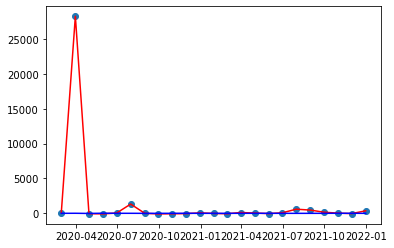

In [18]:
dates =percent_change_df[["Date"]]
Total_COVID_variance_percentage = percent_change_df["Total % variance"]
Total_Industry_variance_percentage=Cleaned_industry_turnover_perc_change["% change Total Industry Seasonal"]

rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')

plt.plot_date(dates ,Total_COVID_variance_percentage, fmt='o', tz=None, xdate=True, ydate=False, data=None)
plt.plot_date(dates ,Total_COVID_variance_percentage, 'r')
plt.plot_date(dates ,Total_Industry_variance_percentage, 'b')

plt.show()

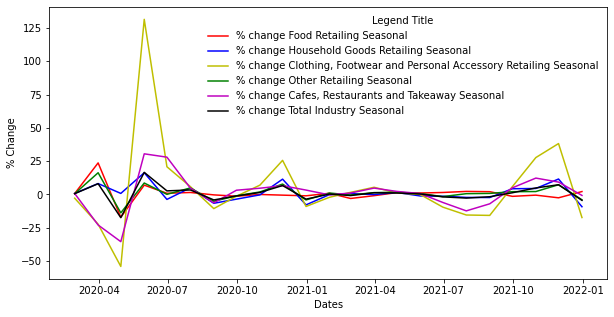

In [19]:
#fig, ax = plt.subplots(1, figsize=(8, 6))

y1=Cleaned_industry_turnover_perc_change["% change Food Retailing Seasonal"]
y2=Cleaned_industry_turnover_perc_change["% change Household Goods Retailing Seasonal"]
y3=Cleaned_industry_turnover_perc_change["% change Clothing, Footwear and Personal Accessory Retailing Seasonal"]
y4=Cleaned_industry_turnover_perc_change["% change Other Retailing Seasonal"]
y5=Cleaned_industry_turnover_perc_change["% change Cafes, Restaurants and Takeaway Seasonal"]
y6=Cleaned_industry_turnover_perc_change["% change Total Industry Seasonal"]

rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
plt.figure(figsize=(10, 5))

plt.plot_date(dates,y1,'r',label="% change Food Retailing Seasonal")
plt.plot_date(dates,y2,'b',label="% change Household Goods Retailing Seasonal")
plt.plot_date(dates,y3,'y',label="% change Clothing, Footwear and Personal Accessory Retailing Seasonal")
plt.plot_date(dates,y4,'g',label="% change Other Retailing Seasonal")
plt.plot_date(dates,y5,'m',label="% change Cafes, Restaurants and Takeaway Seasonal")
plt.plot_date(dates,y6,'k',label="% change Total Industry Seasonal")



# Add a legend with title, position it on the lower right (loc) with no box framing (frameon)
plt.legend(loc="upper right", title="Legend Title", frameon=False)

plt.xlabel('Dates')
plt.ylabel('% Change')

plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'plt'

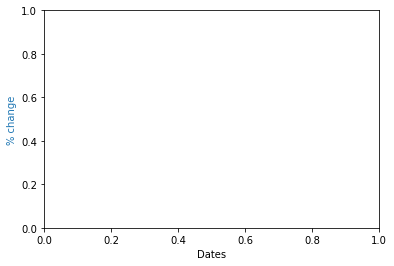

In [39]:
#Negative impact
y=Cleaned_industry_turnover_perc_change["% change Cafes, Restaurants and Takeaway"]

#rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
#loc = RRuleLocator(rule)
#formatter = DateFormatter('%m/%d/%y')

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Dates')
ax1.set_ylabel('% change', color=color)
ax1.plt.plot_date(dates,y5,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.plt.plot_date(dates,Total_COVID_variance_percentage,color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a legend with title, position it on the lower right (loc) with no box framing (frameon)
plt.legend(loc="upper right", title="Legend Title", frameon=False)


#plt.xlabel('Dates')
#plt.ylabel('% Change')

fig.tight_layout()
plt.show()

In [ ]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()

#add first line to plot
ax.plot(df1.year, df1.sales, color=col1)

#add x-axis label
ax.set_xlabel('Year', fontsize=14)

#add y-axis label
ax.set_ylabel('Sales', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(df2.year, df2.leads, color=col2)

#add second y-axis label
ax2.set_ylabel('Leads', color=col2, fontsize=16)

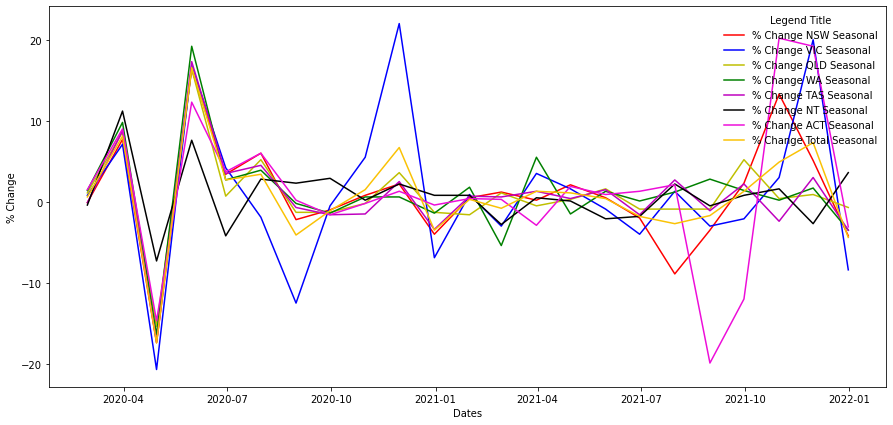

In [29]:
#fig, ax = plt.subplots(1, figsize=(8, 6))

y1=Cleaned_state_turnover_perc_change["% Change NSW Seasonal"]
y2=Cleaned_state_turnover_perc_change["% Change VIC Seasonal"]
y3=Cleaned_state_turnover_perc_change["% Change QLD Seasonal"]
y4=Cleaned_state_turnover_perc_change["% Change WA Seasonal"]
y5=Cleaned_state_turnover_perc_change["% Change TAS Seasonal"]
y6=Cleaned_state_turnover_perc_change["% Change NT Seasonal"]
y7=Cleaned_state_turnover_perc_change["% Change ACT Seasonal"]
y8=Cleaned_state_turnover_perc_change["% Change Total Seasonal"]

rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
plt.figure(figsize=(15, 7))

plt.plot_date(dates,y1,'r',label="% Change NSW Seasonal")
plt.plot_date(dates,y2,'b',label="% Change VIC Seasonal")
plt.plot_date(dates,y3,'y',label="% Change QLD Seasonal")
plt.plot_date(dates,y4,'g',label="% Change WA Seasonal")
plt.plot_date(dates,y5,'m',label="% Change TAS Seasonal")
plt.plot_date(dates,y6,'k',label="% Change NT Seasonal")
plt.plot_date(dates,y7,'#ED0DD9',label="% Change ACT Seasonal")
plt.plot_date(dates,y8,'#FAC205',label="% Change Total Seasonal")


# Add a legend with title, position it on the lower right (loc) with no box framing (frameon)
plt.legend(loc="upper right", title="Legend Title", frameon=False)

plt.xlabel('Dates')
plt.ylabel('% Change')

plt.show()